In [4]:
import gym
import numpy as np
from gym import wrappers

# GLOBAL SETTINGS
RNG_SEED = 8
POPULATION_SIZE = 200  # Population size
GENERATION_LIMIT = 100  # Max number of generations
DISPLAY_WEIGHTS = False  # Help debug weight update
sigma = 0.1  # noise standard deviation
alpha = 0.001  # learning rate

def record_interval(n):
    global UPLOAD_GENERATION_INTERVAL
    global POPULATION_SIZE
    episode_interval = (POPULATION_SIZE + 1) * UPLOAD_GENERATION_INTERVAL
    return n % episode_interval == 0


def run_episode(environment, weight):
    obs = environment.reset()
    episode_reward = 0
    done = False
    while not done:
        action = np.matmul(weight.T, obs)
        move = np.argmax(action)
        obs, reward, done, info = environment.step(move)
        episode_reward += reward
    return episode_reward


env = gym.make('LunarLander-v2')

env.seed(RNG_SEED)
np.random.seed(RNG_SEED)

input_size = env.observation_space.shape[0]
output_size = env.action_space.n

# Initial weights
W = np.zeros((input_size, output_size))
plotGen = []
plotGenEval = []
plotGenMean = []
for gen in range(GENERATION_LIMIT):
    # Measure performance per generation
    gen_eval = run_episode(env, W)

    # Keep track of Returns
    R = np.zeros(POPULATION_SIZE)
    # Generate noise
    N = np.random.randn(POPULATION_SIZE, input_size, output_size)
    for j in range(POPULATION_SIZE):
        W_ = W + sigma * N[j]
        R[j] = run_episode(env, W_)

    # Update weights
    # Summation of episode_weight * episode_reward
    weighted_weights = np.matmul(N.T, R).T
    new_W = W + alpha / (POPULATION_SIZE * sigma) * weighted_weights
    if DISPLAY_WEIGHTS:
        print(W)
    W = new_W
    gen_mean = np.mean(R)
    print(
        "Generation {}, Return: {}, Population Mean: {}".format(gen+1,
                                                                gen_eval,
                                                                gen_mean))
    plotGen.append(gen+1)
    plotGenEval.append(gen_eval)
    plotGenMean.append(gen_mean)
env.close()

Generation 1, Return: -135.3932708344443, Population Mean: -493.37214854630344
Generation 2, Return: -79.90967824275353, Population Mean: -97.60075805204593
Generation 3, Return: -41.12761701818118, Population Mean: -79.45511313344879
Generation 4, Return: -56.2314040987568, Population Mean: -88.25811057058073
Generation 5, Return: -77.37759127075505, Population Mean: -68.29551005346912
Generation 6, Return: -14.232093323911826, Population Mean: -71.001592517789
Generation 7, Return: -23.32840177633659, Population Mean: -78.53086042428731
Generation 8, Return: -52.73399557806579, Population Mean: -69.76399156284901
Generation 9, Return: 18.77517542730206, Population Mean: -79.24504523129205
Generation 10, Return: -22.855076057130134, Population Mean: -62.65410890958265
Generation 11, Return: -6.185558905047316, Population Mean: -55.54826001511476
Generation 12, Return: 10.390613846722246, Population Mean: -58.141616108332485
Generation 13, Return: -45.28264505553334, Population Mean: -

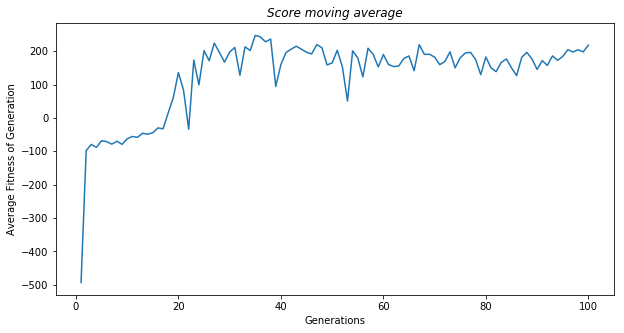

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.xlabel('Generations')
plt.ylabel('Average Fitness of Generation')
plt.title('Score moving average', fontstyle='italic')
plt.plot(plotGen,plotGenMean)
plt.savefig('ES_2.pdf')  
plt.show()

In [3]:
import gym
import numpy as np
from gym import wrappers

# GLOBAL SETTINGS
RNG_SEED = 8
POPULATION_SIZE = 100  # Population size
GENERATION_LIMIT = 100  # Max number of generations
DISPLAY_WEIGHTS = False  # Help debug weight update
sigma = 0.1  # noise standard deviation
alpha = 0.00025  # learning rate



def record_interval(n):
    global UPLOAD_GENERATION_INTERVAL
    global POPULATION_SIZE
    episode_interval = (POPULATION_SIZE + 1) * UPLOAD_GENERATION_INTERVAL
    return n % episode_interval == 0


def run_episode(environment, weight):
    obs = environment.reset()
    episode_reward = 0
    done = False
    while not done:
        action = np.matmul(weight.T, obs)
        move = np.argmax(action)
        obs, reward, done, info = environment.step(move)
        episode_reward += reward
    return episode_reward


env = gym.make('LunarLander-v2')

env.seed(RNG_SEED)
np.random.seed(RNG_SEED)

input_size = env.observation_space.shape[0]
output_size = env.action_space.n

# Initial weights
W = np.zeros((input_size, output_size))
plotGen = []
plotGenEval = []
plotGenMean = []
for gen in range(GENERATION_LIMIT):
    # Measure performance per generation
    gen_eval = run_episode(env, W)

    # Keep track of Returns
    R = np.zeros(POPULATION_SIZE)
    # Generate noise
    N = np.random.randn(POPULATION_SIZE, input_size, output_size)
    for j in range(POPULATION_SIZE):
        W_ = W + sigma * N[j]
        R[j] = run_episode(env, W_)

    # Update weights
    # Summation of episode_weight * episode_reward
    weighted_weights = np.matmul(N.T, R).T
    new_W = W + alpha / (POPULATION_SIZE * sigma) * weighted_weights
    if DISPLAY_WEIGHTS:
        print(W)
    W = new_W
    gen_mean = np.mean(R)
    print(
        "Generation {}, Return: {}, Population Mean: {}".format(gen+1,
                                                                gen_eval,
                                                                gen_mean))
    plotGen.append(gen+1)
    plotGenEval.append(gen_eval)
    plotGenMean.append(gen_mean)
env.close()

Generation 1, Return: -135.3932708344443, Population Mean: -501.7353187829203
Generation 2, Return: -148.68799032614848, Population Mean: -149.25866590612196
Generation 3, Return: -47.73430365955939, Population Mean: -125.5117237397641
Generation 4, Return: -65.56927625333692, Population Mean: -92.90796366332593
Generation 5, Return: -58.53809027308516, Population Mean: -76.60463548372697
Generation 6, Return: -75.50031312487698, Population Mean: -92.61686568977382
Generation 7, Return: -120.76368462005573, Population Mean: -70.68715466148579
Generation 8, Return: 15.623131257517244, Population Mean: -72.97295859094788
Generation 9, Return: -51.42832844864557, Population Mean: -75.18406730965921
Generation 10, Return: -32.13674003137345, Population Mean: -65.75661002141881
Generation 11, Return: -40.48698348435617, Population Mean: -40.38232722044389
Generation 12, Return: 271.3835606336477, Population Mean: -24.33821463855657
Generation 13, Return: -22.84785042838857, Population Mean:

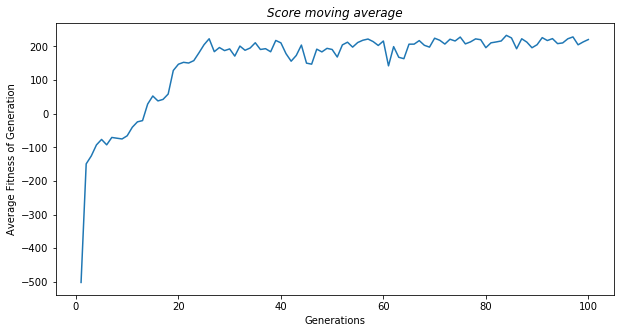

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.xlabel('Generations')
plt.ylabel('Average Fitness of Generation')
plt.title('Score moving average', fontstyle='italic')
plt.plot(plotGen,plotGenMean)
#plt.savefig('GA_1.pdf')  
plt.show()